In [63]:
setwd('/import/DB/fel/BJTC-204')

In [64]:
load('./exp4.rda')

In [65]:
library(dplyr)

In [66]:
head(exp4,2)

,death,TYPE,PH,Gender,race,Age,GSM,NAT2,ADA,CDH2,...,HNRPDL,DMTF1,PPP4R1,CDH1,SLC12A6,ROD1,KCNE2,DGCR2,CASP8AP2,SCO2
,<int>,<chr>,<dbl>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GSM2431721,0,Control,6.97,M,Caucasian,32,GSM2431721,6.918508,5.958536,7.389671,...,8.062601,8.039051,6.266754,4.402844,6.107446,5.091350,7.473668,7.085446,5.301909,5.986224
GSM2431722,0,Control,7.01,F,Caucasian,63,GSM2431722,6.397328,6.113981,7.629390,...,9.066047,8.447141,6.887356,4.383695,5.726334,4.867468,7.710730,7.402328,5.598268,6.171961


In [67]:
exp4 = exp4 %>%  dplyr::filter(Gender == 'F')

In [68]:
dim(exp4)

[1]    61 11882

In [69]:
expr = exp4[,8:11882]

colnames(expr) = gsub('-','.',colnames(expr))
expr <- expr[, !grepl("^\\d+", names(expr))]

In [70]:
expr1 = expr%>%  t() %>%  as.data.frame()

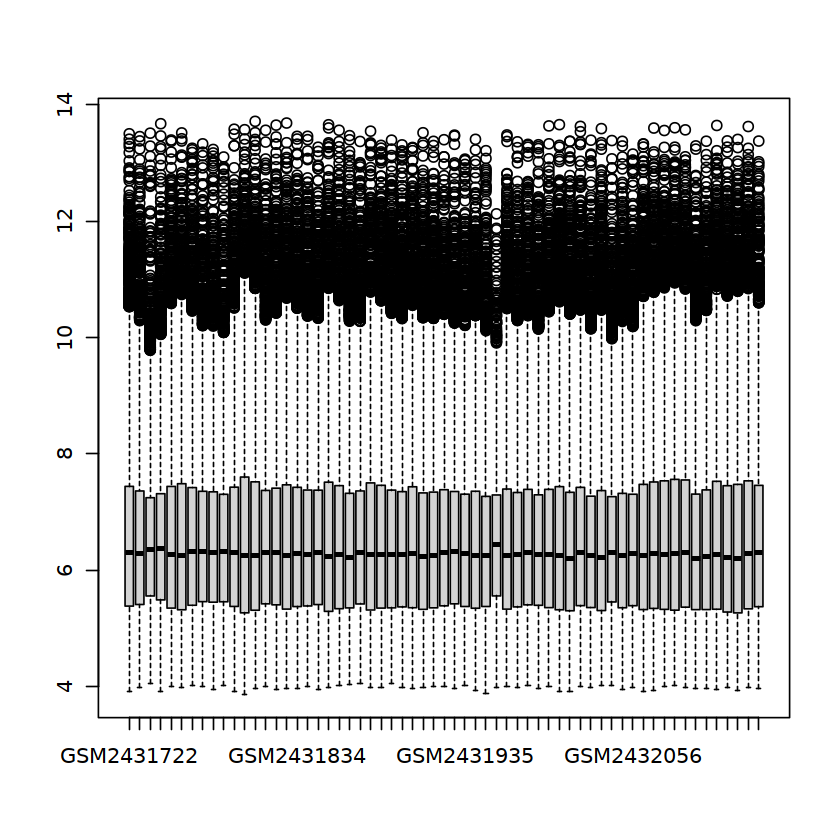

In [71]:
boxplot(expr1)

In [72]:
TYPE = exp4$TYPE

In [73]:
library(limma)
library(dplyr)
f <- TYPE %>% as.factor()

In [74]:
TYPE

[1] "Control" "Control" "Control" "Control" "Control" "Control" "Control"
 [8] "MDD"     "Control" "Control" "MDD"     "Control" "MDD"     "Control"
[15] "MDD"     "MDD"     "Control" "Control" "Control" "Control" "Control"
[22] "Control" "Control" "Control" "Control" "Control" "Control" "Control"
[29] "Control" "Control" "Control" "Control" "Control" "MDD"     "Control"
[36] "Control" "MDD"     "Control" "Control" "MDD"     "Control" "MDD"    
[43] "MDD"     "MDD"     "Control" "Control" "Control" "Control" "Control"
[50] "Control" "Control" "Control" "Control" "Control" "Control" "Control"
[57] "MDD"     "MDD"     "MDD"     "MDD"     "MDD"

In [75]:
desigN <- model.matrix(~ 0 + f)
colnames(desigN) <- levels(f)
fit = lmFit(expr1, desigN)
contrast.matrix <- makeContrasts(MDD - Control, levels = colnames(coef(fit)))
contrast.matrix 

,MDD - Control
Control,-1
MDD,1


In [76]:
fit2 <- contrasts.fit(fit, contrast.matrix) 
fit2 <- eBayes(fit2) 
tempOutput <- topTable(fit2,coef=1,n=Inf,adjust="BH")
head(tempOutput)

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ABCB1,-0.5143795,6.254714,-4.702209,1.485257e-05,0.1187577,2.745530
ARL4C,0.5231190,7.853045,4.493683,3.128339e-05,0.1187577,2.115081
S100A10,-0.5016684,7.649009,-4.454364,3.594317e-05,0.1187577,1.997603
TIAM1,0.3050152,8.345453,4.310528,5.945970e-05,0.1187577,1.571896
ATP2B2,0.5390423,8.108197,4.291540,6.350969e-05,0.1187577,1.516191
VIM,-0.6917721,9.777355,-4.232101,7.799159e-05,0.1187577,1.342589


In [87]:
diff <- 
  tempOutput %>% 
  mutate(change = as.factor(ifelse(P.Value		 < 0.05 & abs(logFC) > 0.8,
                                   ifelse(logFC > 0.8 ,'Up','Down'),'NOT'))) 
diff$gene = rownames(diff)

In [88]:
table(diff$change)


 Down   NOT    Up 
    7 11826    26 

In [89]:
library(ggplot2)
library(ggpubr)
library(ggrepel)
library(cowplot)

In [90]:
top_5 <- bind_rows(   
      diff %>%
        filter(gene  %in% c('CNIH3','OTUD4','MUS81','UCK2')) %>%
        arrange(P.Value, desc(logFC)) %>%
        head(0),
      diff %>%
        filter(gene  %in% c()) %>%
        arrange(P.Value, desc(logFC)) %>%
        head(0)
    )

Warning message:
"Removed 7 rows containing missing values or values outside the scale range
(`geom_point()`)."


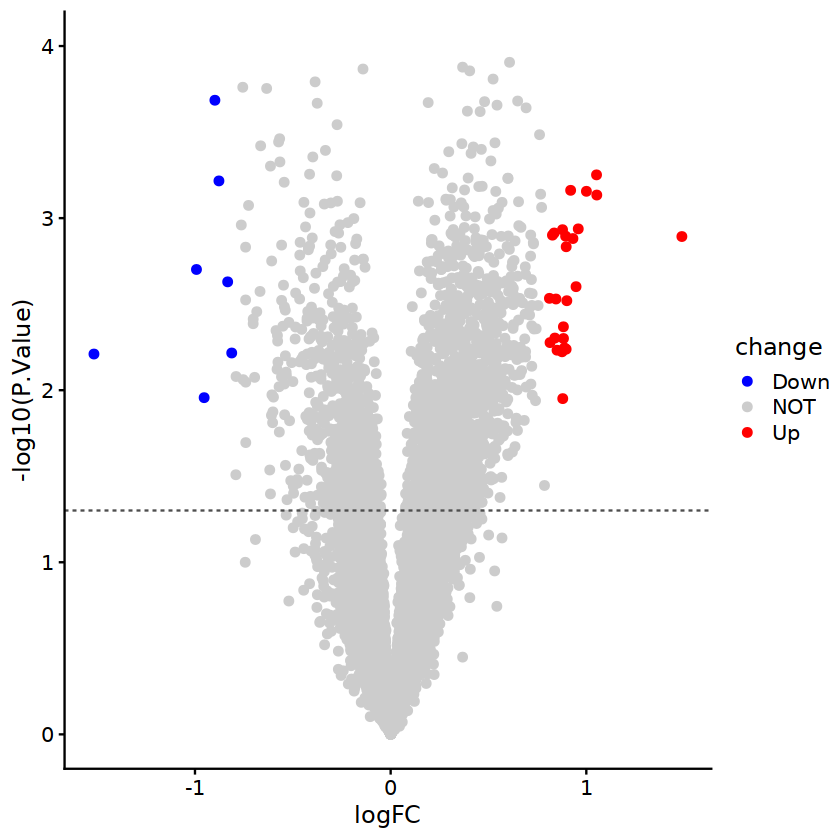

In [91]:
    ggplot(data=diff,aes(x=logFC,y=-log10(P.Value)))+
    geom_point(aes(color=change),size=2)+
    geom_hline(yintercept = -log10(0.05), linetype="dashed",color="grey30")+
    #geom_vline(xintercept = c(-0.3,0.3),linetype="dashed",color="grey30")+
    geom_text_repel(data=top_5,aes(x= logFC,y= -log10(P.Value),label= rownames(top_5)))+
    scale_color_manual(values = c("blue","grey80","red"))+
    theme_half_open() +ylim(0,4)#+xlim(-1.5,1.5)

In [92]:
tempOutput1 = diff
write.csv(tempOutput1,file = 'diffgene1-female.csv')